In [17]:
# NOTE: copied from notebook DUDL_ANN_classifyQwerties.ipynb

In [18]:
# import libraries

import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt
from IPython import display
display.set_matplotlib_formats('svg')

C:\Users\DOANTR~1\AppData\Local\Temp/ipykernel_19052/1120371528.py:9: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  display.set_matplotlib_formats('svg')


# The Data

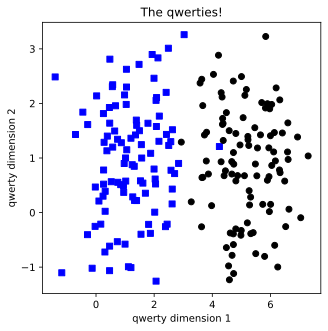

In [19]:
# Create data
n_per_clust = 100
blur        = 1 # Standard deviation, how spread out the data values are

# x, y center coordinates for the data cluster
A = [1, 1]
B = [5, 1]

# Generate data
a = [A[0] + np.random.randn(n_per_clust) * blur, A[1] + np.random.randn(n_per_clust) * blur]
b = [B[0] + np.random.randn(n_per_clust) * blur, B[1] + np.random.randn(n_per_clust) * blur]
# Concatanate into a matrix, np -> numpy
data_np = np.hstack(tup=(a, b)).T

# True category-labels
labels_np = np.vstack(tup=(np.zeros(shape=(n_per_clust, 1)), np.ones(shape=(n_per_clust, 1))))

# Convert to a pytorch tensor
data   = torch.tensor(data=data_np).float()
labels = torch.tensor(data=labels_np).float()

# Show the data
fig = plt.figure(figsize=(5, 5))
plt.plot(data[np.where(labels == 0)[0], 0], data[np.where(labels == 0)[0], 1], 'bs')
plt.plot(data[np.where(labels == 1)[0], 0], data[np.where(labels == 1)[0], 1], 'ko')
plt.title('The qwerties!')
plt.xlabel('qwerty dimension 1')
plt.ylabel('qwerty dimension 2')
plt.show()

In [20]:
# inspect types
print(type(data_np))
print(np.shape(data_np))
print(' ')

print(type(data))
print(np.shape(data))

<class 'numpy.ndarray'>
(200, 2)
 
<class 'torch.Tensor'>
torch.Size([200, 2])


In [21]:
# # build the model
# ANNclassify = nn.Sequential(
#     nn.Linear(2,1),   # input layer
#     nn.ReLU(),        # activation unit
#     nn.Linear(1,1),   # output unit
#     nn.Sigmoid(),     # final activation unit (here for conceptual reasons; in practice, better to use BCEWithLogitsLoss)
#       )


# Define the class

In [22]:
# The class that creates the model template
class the_class_4_ANN(nn.Module):
  def __init__(self):
    super().__init__()

    # Input layer
    self.input = nn.Linear(in_features=2, out_features=1)

    # Output layer
    self.output = nn.Linear(in_features=1, out_features=1)

  # Forward pass
  def forward(self, data_x):
    # Pass through the input layer
    data_x = self.input(data_x)

    # Apply ReLU
    data_x = F.relu(data_x)

    # Output layer
    data_x = self.output(data_x)
    data_x = torch.sigmoid(data_x)

    return data_x

# Create an instance of the model class
ANN_classify = the_class_4_ANN()

# Other model features

In [23]:
learning_rate = 0.01

# Loss function
loss_func = nn.BCELoss()
# Note: You'll learn in the "Metaparameters" section that it's better to use BCEWithLogitsLoss, but this is OK for now.

# Optimizer
optimizer = torch.optim.SGD(params=ANN_classify.parameters(), lr=learning_rate)


# Train the model

In [24]:
num_epochs = 1000
losses     = torch.zeros(num_epochs)

for epoch_i in range(num_epochs):
  # Forward pass
  y_hat = ANN_classify(data)
  # Compute loss
  loss            = loss_func(y_hat, labels)
  losses[epoch_i] = loss
  # Backprop
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

# Show the losses

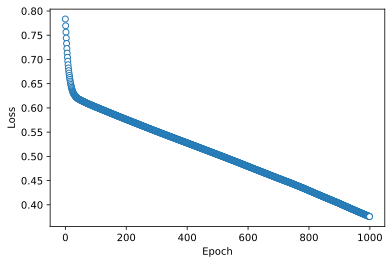

In [25]:
plt.plot(losses.detach(), 'o', markerfacecolor='w', linewidth=.1)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

# Compute the predictions

In [26]:
# Manually compute losses
# Final forward pass, values between 0 & 1
predictions = ANN_classify(data)
# Boolean
pred_labels = predictions > 0.5

# Find errors
misclassified = np.where(pred_labels != labels)[0]

# Total accuracy
total_acc = 100 - 100 * len(misclassified) / (2 * n_per_clust)
print(f'Final Accuracy: {total_acc}')

Final Accuracy: 92.5


# Plot the labeled data

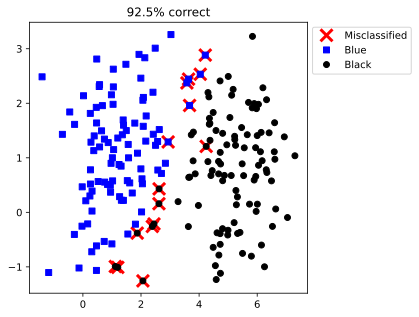

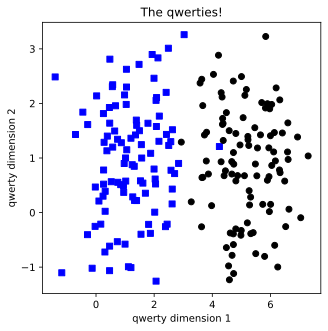

In [27]:
fig = plt.figure(figsize=(5, 5))
plt.plot(data[misclassified, 0], data[misclassified, 1], 'rx', markersize=12, markeredgewidth=3)
plt.plot(data[np.where(~pred_labels)[0], 0], data[np.where(~pred_labels)[0], 1], 'bs')
plt.plot(data[np.where(pred_labels)[0], 0], data[np.where(pred_labels)[0], 1], 'ko')
plt.legend(['Misclassified', 'Blue', 'Black'], bbox_to_anchor=(1, 1))
plt.title(f'{total_acc}% correct')
plt.show()

fig = plt.figure(figsize=(5, 5))
plt.plot(data[np.where(labels == 0)[0], 0], data[np.where(labels == 0)[0], 1], 'bs')
plt.plot(data[np.where(labels == 1)[0], 0], data[np.where(labels == 1)[0], 1], 'ko')
plt.title('The qwerties!')
plt.xlabel('qwerty dimension 1')
plt.ylabel('qwerty dimension 2')
plt.show()